
#Advertisement Budget Using Linear Regression

##Project Goals

The objective of this project is to analyze how advertising budgets allocated to different media channels (TV, Radio, Newspaper) influence the product Sales. Using data-driven techniques, we aim to:

- Understand the relationship between advertising spend and sales.
- Determine which advertising channel is most effective.
- Build a predictive model to estimate sales based on ad budgets.
- Provide business insights for better marketing strategy decisions.



## Importing Libraries

To begin with, we import the necessary Python libraries required for data analysis, visualization, preprocessing, modeling, and evaluation.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## Loading and Viewing the Dataset

We load the dataset using pandas.read_csv() and display the first five rows using df.head(). This helps us understand the structure of the dataset and verify it loaded correctly.


In [ ]:
df=pd.read_csv('/content/Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Renaming Columns for Simplicity

The original column names contain extra characters like currency symbols and spaces, which can be inconvenient for analysis. We rename the columns to simplified names for easier referencing:




In [ ]:
df.rename(columns={'Unnamed: 0':'S.No',
                   'Sales ($)':'Sales',
                   'TV Ad Budget ($)':'TV',
                   'Radio Ad Budget ($)':'Radio',
                   'Newspaper Ad Budget ($)':'Newspaper'},inplace=True)
df.head()

,S.No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe() #Use to see the data description

,S.No,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info() #Check the information like data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.No       200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Check null values
Check if there are null values present in dataset or not

In [ ]:
df.isnull().sum()

,0
S.No,0
TV,0
Radio,0
Newspaper,0
Sales,0


##Pair plot
use Seaborn’s pairplot() to visualize pairwise relationships between all numerical variables

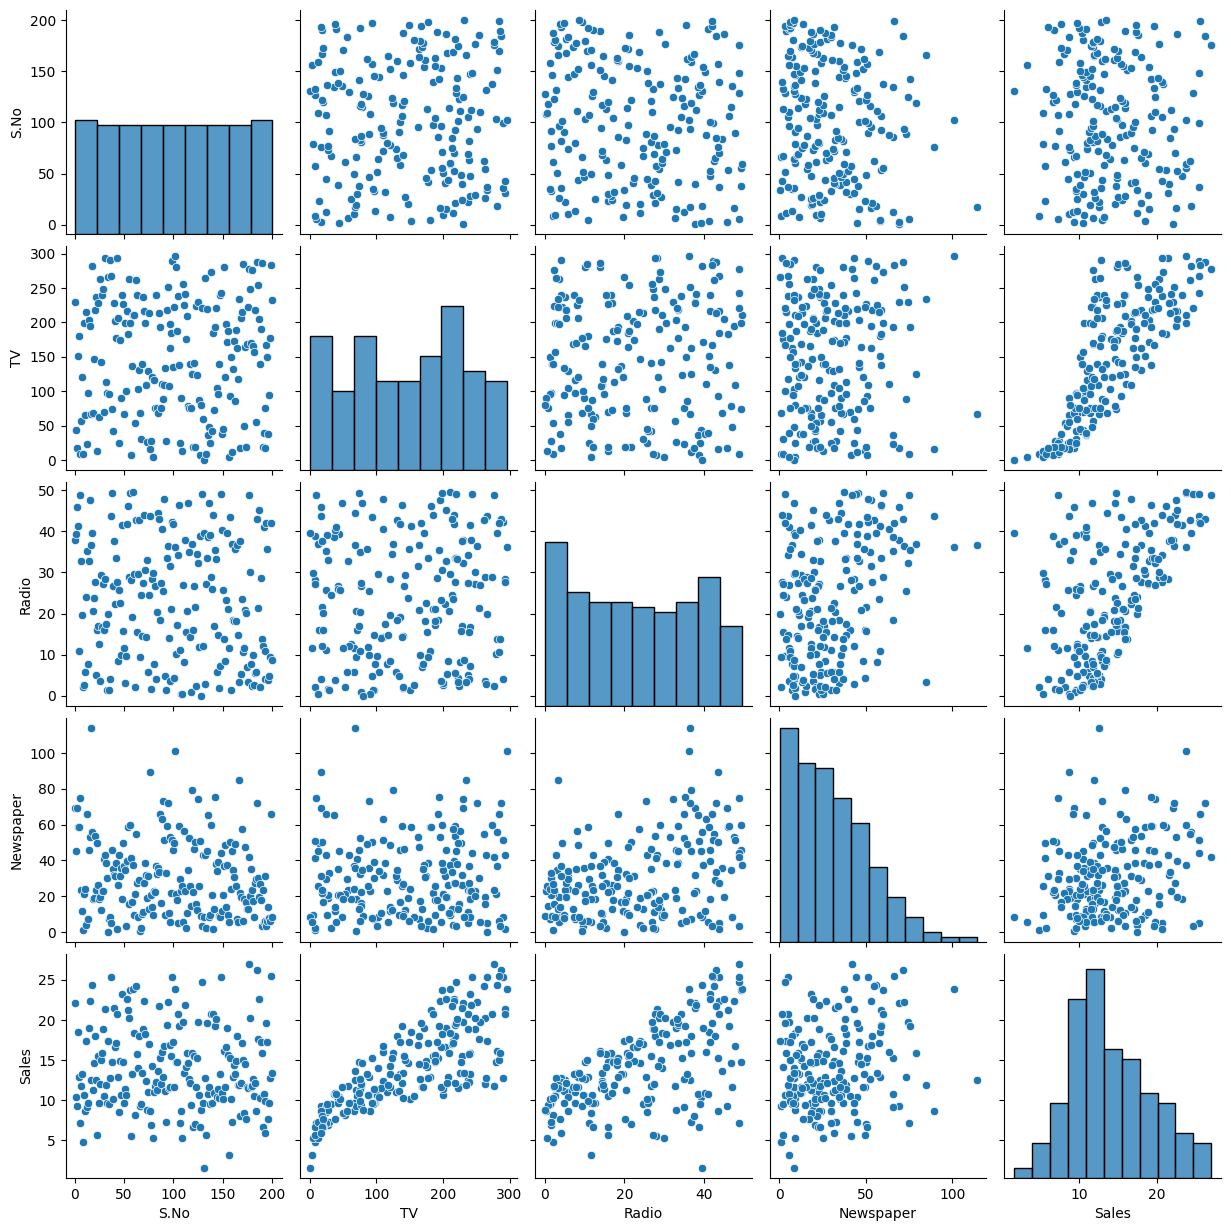

In [ ]:
sns.pairplot(df)

## Correlation Heatmap

We use a heatmap to visualize the correlation matrix of the dataset. This helps identify how strongly related each feature is to one another.

- A correlation close to +1 implies a strong positive linear relationship.
- A correlation close to -1 implies a strong negative linear relationship.
- A correlation near 0 implies little to no linear relationship.



<Axes: >

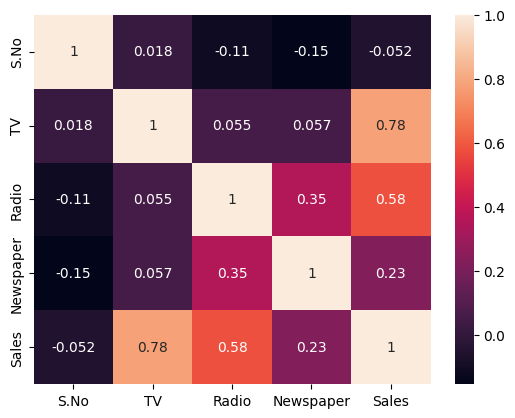

In [ ]:
sns.heatmap(df.corr(),annot=True)

## Boxplot Analysis for Outlier Detection

We use boxplots to visually detect outliers in the advertising budget columns (TV, Radio, Newspaper). Boxplots help us understand:

- The distribution of values
- The presence of outliers


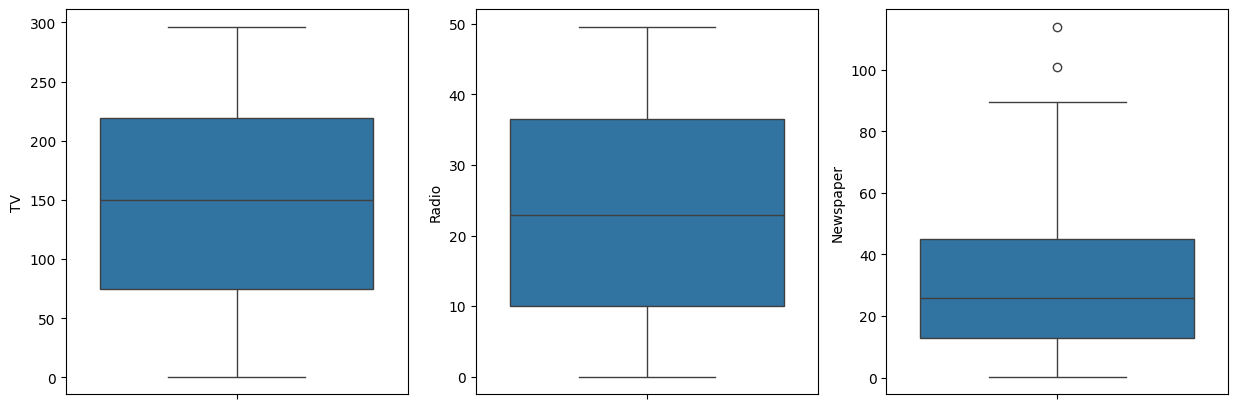

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(df['TV'])
plt.subplot(1,3,2)
sns.boxplot(df['Radio'])
plt.subplot(1,3,3)
sns.boxplot(df['Newspaper'])
plt.show()

## Outlier Removal using IQR Method

To ensure our analysis is not skewed by extreme values, we remove outliers using the Interquartile Range (IQR) method.

IQR Method Steps:
- Q1 = 25th percentile
- Q3 = 75th percentile
- IQR = Q3 − Q1
- Outlier bounds = [Q1 − 1.5*IQR, Q3 + 1.5*IQR]

We iterate through all columns and remove rows containing values outside these bounds.


In [ ]:
outliers = df.copy()
for i in df.columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outliers=outliers[(outliers[i]>=lower) & (outliers[i]<=upper)]
outliers.head()

,S.No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Boxplot Visualization After Outlier Removal

To verify the effectiveness of our outlier removal process, we replot the boxplots for the advertising budget features using the cleaned dataset (outliers).

The boxplots should now:

- Have no extreme points beyond the whiskers.
- Show a more compact and reliable distribution.


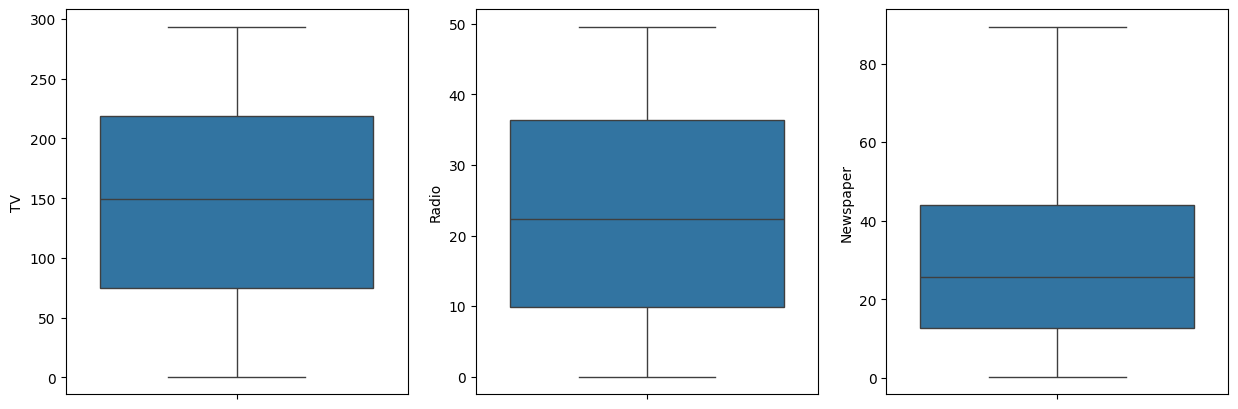

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(outliers['TV'])
plt.subplot(1,3,2)
sns.boxplot(outliers['Radio'])
plt.subplot(1,3,3)
sns.boxplot(outliers['Newspaper'])
plt.show()

##Feature Scaling After Outlier Removal

We apply StandardScaler to the cleaned dataset to standardize the features (TV, Radio, Newspaper).


In [ ]:
sc=StandardScaler()
sc_outliers=outliers.copy()
sc_outliers['TV']=sc.fit_transform(sc_outliers[['TV']])
sc_outliers['Radio']=sc.fit_transform(sc_outliers[['Radio']])
sc_outliers['Newspaper']=sc.fit_transform(sc_outliers[['Newspaper']])
sc_outliers.head()

,S.No,TV,Radio,Newspaper,Sales
0,1,0.978697,0.989521,1.932998,22.1
1,2,-1.199012,1.090705,0.751313,10.4
2,3,-1.519332,1.535913,1.937901,9.3
3,4,0.056456,1.225616,1.408349,18.5
4,5,0.400243,-0.831784,1.403446,12.9


##Splitting the Data and Training a Linear Regression Model

We now split the scaled and cleaned dataset into training and testing sets. Then, we fit a Linear Regression model to predict Sales based on the advertising budgets.

1. X_sc contains scaled features (TV, Radio, Newspaper)
2. y_sc contains the target variable (Sales)
3. train_test_split splits the data (80% train, 20% test)
4. We train a LinearRegression model on the training data
5. We make predictions on the test set


In [ ]:
X_sc = sc_outliers.drop(['Sales', 'S.No'], axis=1)
y_sc = sc_outliers['Sales']
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y_sc, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train_sc, y_train_sc)
y_pred_sc = model.predict(X_test_sc)

##Model Evaluation – Mean Squared Error (MSE)

We evaluate the performance of our linear regression model using Mean Squared Error (MSE).

- Measures the average of the squares of the prediction errors.
- Lower values indicate better model performance.
- It penalizes larger errors more than smaller ones (because of squaring).



In [ ]:
mse_sc=mean_squared_error(y_test_sc,y_pred_sc)
print("MSE Socre is=",mse_sc)

MSE Socre is= 2.7409119066899947


##Model Evaluation – R^2 Score

We compute the R^2 Score (coefficient of determination) to evaluate how well the model explains the variability of the target variable (Sales).

- R^2 = 1 → Perfect fit (model explains 100% of variance)
- R^2 = 0 → Model explains no variance (as good as mean prediction)
- R^2 < 0 → Model is worse than simply predicting the mean

The closer the R^2 value is to 1, the better the model fits the data.


In [ ]:
R2error_sc=r2_score(y_test_sc,y_pred_sc)
print("R2 Score is=",R2error_sc)

R2 Score is= 0.8989454779619588


##Model Evaluation – Mean Absolute Error (MAE)

We also calculate the Mean Absolute Error (MAE) to evaluate our regression model.


- Represents the average absolute difference between actual and predicted values.
- Unlike MSE, it does not square the errors, so it’s more interpretable.
- Less sensitive to outliers than MSE.



In [ ]:
mae_sc=mean_absolute_error(y_test_sc,y_pred_sc)
print("MAE Score is=",mae_sc)

MAE Score is= 1.2497394075236383


## Predicted vs Actual Sales – Visualization

We create a scatter plot to compare the predicted sales with the actual sales. A red diagonal line represents perfect predictions.

- If predictions are accurate, points will lie close to the red line.
- Systematic deviation from the line may indicate bias.
- Random scatter around the line indicates a good fit with no clear error pattern.



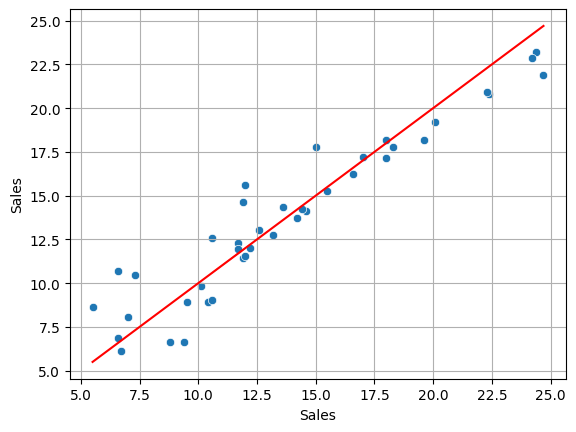

In [ ]:
sns.scatterplot(x=y_test,y=y_pred)
sns.lineplot(x=y_test_sc,y=y_test_sc,color='red')
plt.grid(True)
plt.show()

##Conclusion: Predicted vs Actual Sales Plot

The scatter plot above compares the predicted sales (from our Linear Regression model) with the actual sales values. The red diagonal line represents perfect predictions.

## Observations:
- Most of the data points lie close to the red line, indicating accurate predictions.
- A few points deviate slightly, but no major outliers suggest strong generalization.
- The plot confirms that the linear regression model is performing well on the test set.



##Interpreting Model Coefficients

After training our Linear Regression model, we examine the learned coefficients to understand the impact of each advertising channel on Sales.

Each coefficient represents the change in Sales for a one-unit increase in the corresponding (scaled) feature, assuming other features are held constant.



In [ ]:
model.coef_

array([0.04522886, 0.18239275, 0.00504291])

## Model Intercept

The intercept of the linear regression model represents the predicted sales when all advertising budgets (TV, Radio, Newspaper) are at their average (standardized) values.



In [ ]:
model.intercept_

np.float64(2.9798978284169078)

# Final Conclusion: Advertising Budget and Sales Prediction

In this project, I analyzed how advertising budgets across TV, Radio, and Newspaper channels affect product sales. The goal was to build a regression model that could accurately predict sales based on the advertising spend in each medium.

Summary of the steps followed:
- Loaded the dataset and renamed the columns for better readability.
- Performed exploratory data analysis using pairplots, boxplots, and correlation heatmaps.
- Identified and removed outliers using the IQR method to improve model performance.
- Standardized the features using StandardScaler to bring all variables to the same scale.
- Built a Linear Regression model using the cleaned and scaled data.
- Evaluated the model using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared score.
- Visualized actual versus predicted sales using a scatter plot.
- Analyzed model coefficients to interpret the influence of each advertising channel.

Key insights:
- Radio advertising had the strongest positive impact on sales.
- TV advertising also contributed positively, though less than radio.
- Newspaper advertising had very little effect on sales.
- The model performed well, showing a high R-squared score and low error values.

Final model equation (based on standardized features):
Sales = 2.98 + 0.045 * TV + 0.182 * Radio + 0.005 * Newspaper

Business implication:
Radio advertisements should be prioritized when aiming to improve sales. TV can be considered a secondary channel, and the budget for newspaper ads may be reduced or re-evaluated.

Future scope:
- Try regularization techniques like Ridge or Lasso regression.
- Test non-linear models such as decision trees or random forests.
- Perform cross-validation to further validate model performance.
- Explore interactions between features or seasonal advertising patterns.

Overall, the project successfully showed that a linear regression model can effectively predict sales based on advertising spend, and it provided useful insights for marketing budget allocation.
